In [72]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#reads the csv dataset file
kidneyData = pd.read_csv("Downloads/dataset-kidney-stone-1.csv")

In [73]:
#shows the dataset rows and columns 
kidneyData

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...,...
85,85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,88,1.023870,5.106433,325,12.124689,50,0.781620,1


In [74]:
# i dropped unecessary column
kidneyData = kidneyData.drop('Unnamed: 0', axis=1)
kidneyData

,gravity,ph,osmo,cond,urea,calc,target
0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...
85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,1.023870,5.106433,325,12.124689,50,0.781620,1


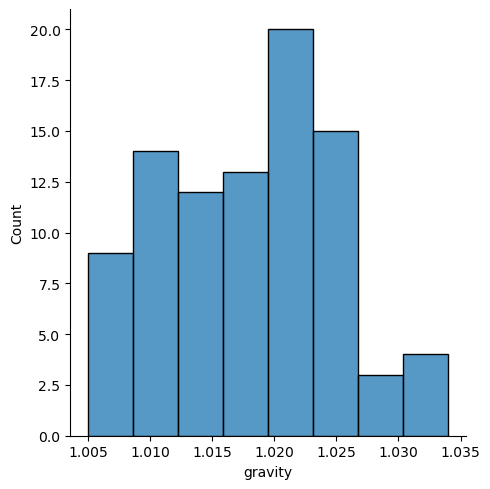

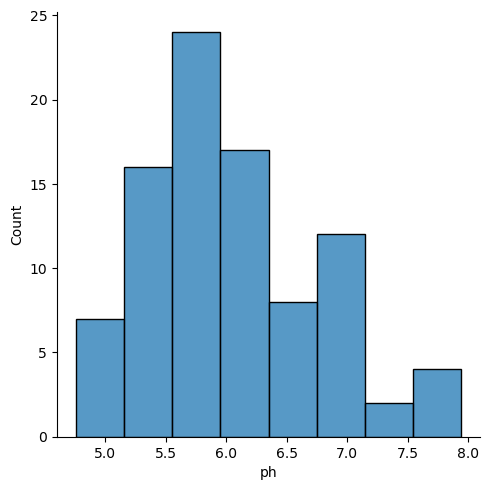

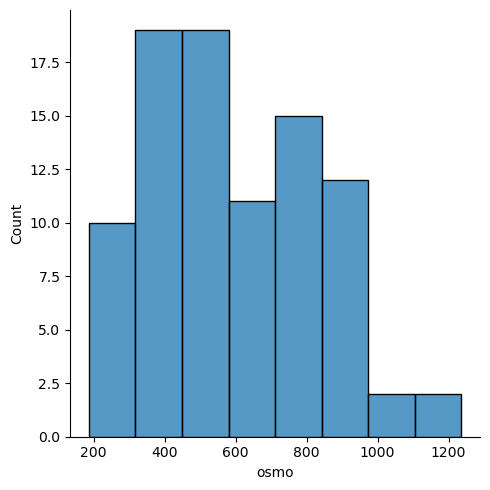

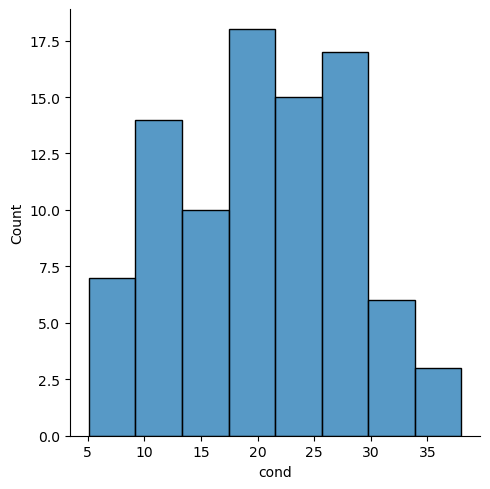

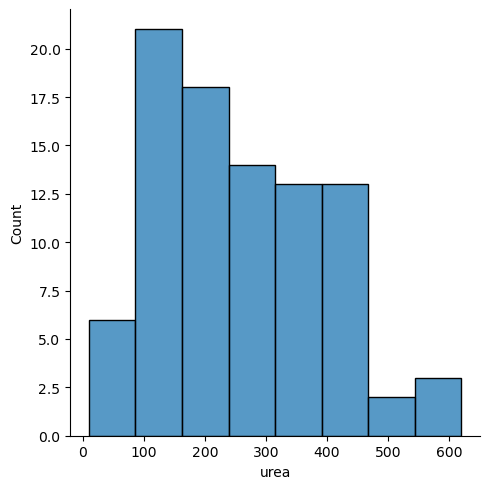

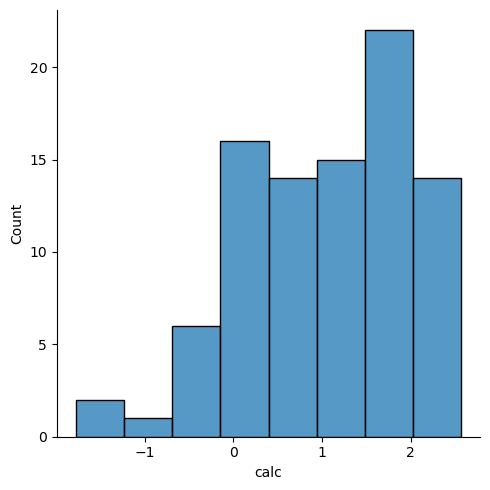

In [75]:
# visualization
sns.displot(kidneyData['gravity'])
sns.displot(kidneyData['ph'])
sns.displot(kidneyData['osmo'])
sns.displot(kidneyData['cond'])
sns.displot(kidneyData['urea'])

#outliers
kidneyData['calc'] = np.log(kidneyData['calc'])
sns.displot(kidneyData['calc'])
plt.show()

In [76]:
# splitting the dataframe from "target"
x = kidneyData[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']]
y = kidneyData[['target']]

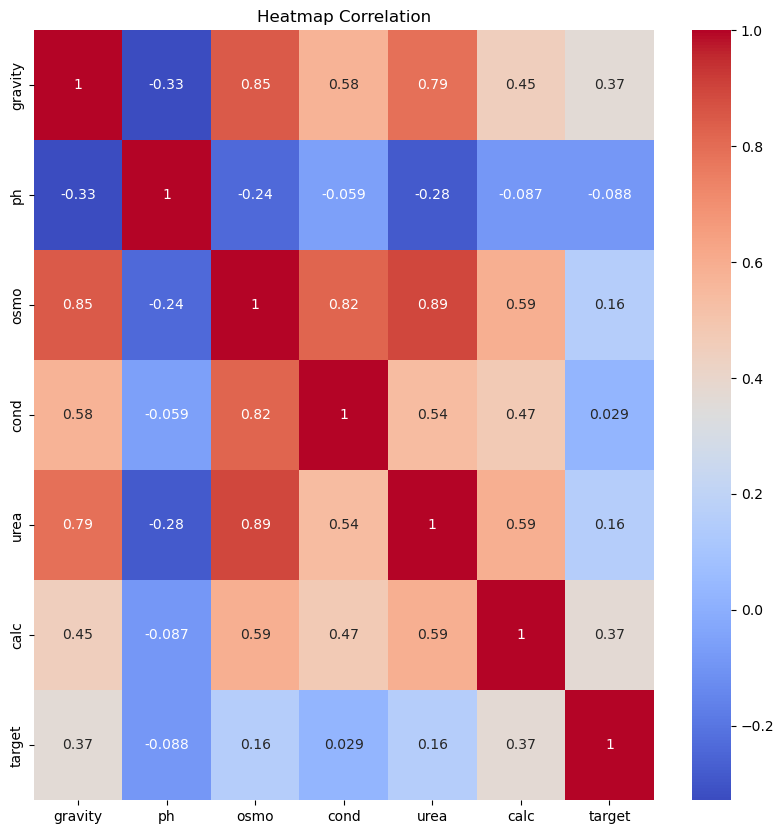

In [77]:
# heatmap
corrMap = kidneyData.corr()
plt.figure(figsize = (10,10))
heatmap = sns.heatmap(corrMap, annot=True, cmap='coolwarm')
heatmap.set_title('Heatmap Correlation')
plt.show()

In [80]:
from sklearn.preprocessing import StandardScaler

#standarizing the dataframe for the features
scaler = StandardScaler()
kidneyData[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']] = scaler.fit_transform(kidneyData[['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']])

In [81]:
x = kidneyData

# dropping features that are not needed in 'x'
x = x.drop(['target'], axis = 1)
x = x.drop(['gravity'], axis = 1)
x = x.drop(['ph'], axis = 1)
x = x.drop(['cond'], axis = 1)

x

,osmo,urea,calc
0,0.517294,1.372682,-0.175987
1,-0.106833,0.280776,0.496896
2,-1.186403,-1.167671,-0.217560
3,-0.819518,-0.254035,-0.321079
4,-1.751491,-1.241951,-1.006495
...,...,...,...
85,0.648023,0.808159,1.091562
86,-0.224911,-0.402594,0.776518
87,2.035440,2.360598,1.227073
88,-1.169535,-1.546496,-1.445046


In [83]:
# split the dataset into training and testing set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

# XGBoost Model

In [86]:
import xgboost as xgb

xgbClf = xgb.XGBClassifier()

# training the model
xgbClf.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [87]:
# predictions for training and testing data

y_pred = xgbClf.predict(x_test)
y_trainPred = xgbClf.predict(x_train)

In [90]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score

# evaluating for the testing model
accuracy = accuracy_score(y_test, y_pred)

# evaluating for the training model
trainAccuracy = accuracy_score(y_train, y_trainPred)

# for the roc curve and scores for it
xgboosts, xgboostt, _ = roc_curve(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

# f1 score
f_score = f1_score(y_test, y_pred)

#print

print('F-score:', f_score)
print('AUC-ROC score:', auc_roc)
print("Accuracy:", accuracy.round(2))
print("Accuracy for testing: ", accuracy)
print("Accuracy for training: ", trainAccuracy)

F-score: 0.75
AUC-ROC score: 0.7922077922077921
Accuracy: 0.78
Accuracy for testing:  0.7777777777777778
Accuracy for training:  0.9861111111111112


In [95]:
from sklearn.model_selection import RandomizedSearchCV

# hyperparameter grid to search over

param_grid = { 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 6, 9], 'subsample': [0.5, 0.75, 1], 'n_estimators': [50, 100, 200]}

# creates a random search for the CV object
xgb_model_BP = xgb.XGBClassifier(random_state=42)
randomSearch = RandomizedSearchCV(xgb_model_BP, param_distributions = param_grid, n_iter = 10, cv = 5, n_jobs = -1, random_state = 42)

# fits the CV object to the training data
randomSearch.fit(x_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_cat_to_onehot=None,
                            

In [98]:
# grabs the best parameters in the model
bestParams = randomSearch.best_params_

# this trains the XGBoost model to find the best parameters
bestParams_model = xgb.XGBClassifier(**bestParams, random_state=42)
bestParams_model.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [115]:
from sklearn.metrics import precision_score, recall_score

# testing and training for the performance of the models
y_pred = bestParams_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
y_prediction_train = bestParams_model.predict(x_train)
accuracy_train = accuracy_score(y_train, y_prediction_train)
print('Accuracy for testing:', accuracy)
print('Accuracy for training', accuracy_train)

#scores
xgbBestParams, xgbBestPred, _ = roc_curve(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)
f_score = f1_score(y_test, y_pred)
print('F-score : ', f_score)
print('AUC-ROC score: ', auc_roc)


Accuracy for testing: 0.9444444444444444
Accuracy for training 0.9583333333333334
F-score :  0.9333333333333333
AUC-ROC score:  0.9545454545454545


In [121]:
precision_score(y_test, y_pred).round()

1.0

In [122]:
recall_score(y_test, y_pred).round()

1.0

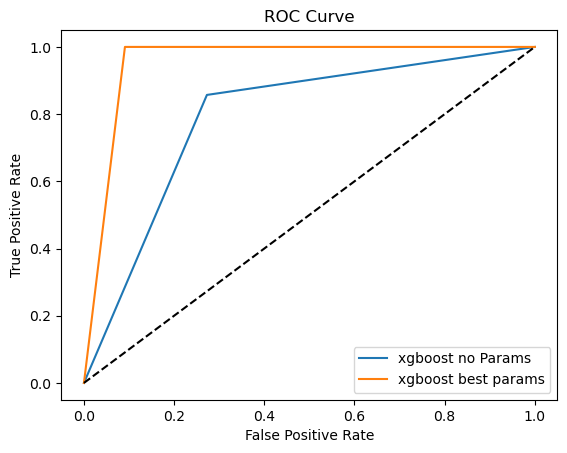

In [123]:
# ROC Curve graph

plt.plot(xgboosts, xgboostt, label='xgboost no Params')
plt.plot(xgbBestParams, xgbBestPred, label='xgboost best params')

#labels for the graph
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

## We can conclude that using XGBoost to predict kidney stone risk has the potential to accuractely predict the risk. You have to have the best parameters so the model can give you an accurate description if you dont use the best parameter then you will get an overfitting model. This showed me that using the XGBoost can help with other similar situations of prediction models.